<a href="https://colab.research.google.com/github/Anand11500/Netflix-Movies-and-Tv-shows/blob/main/Netflix_Movies_And_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Name  -** Anand Salunkhe


# **Project Summary -**

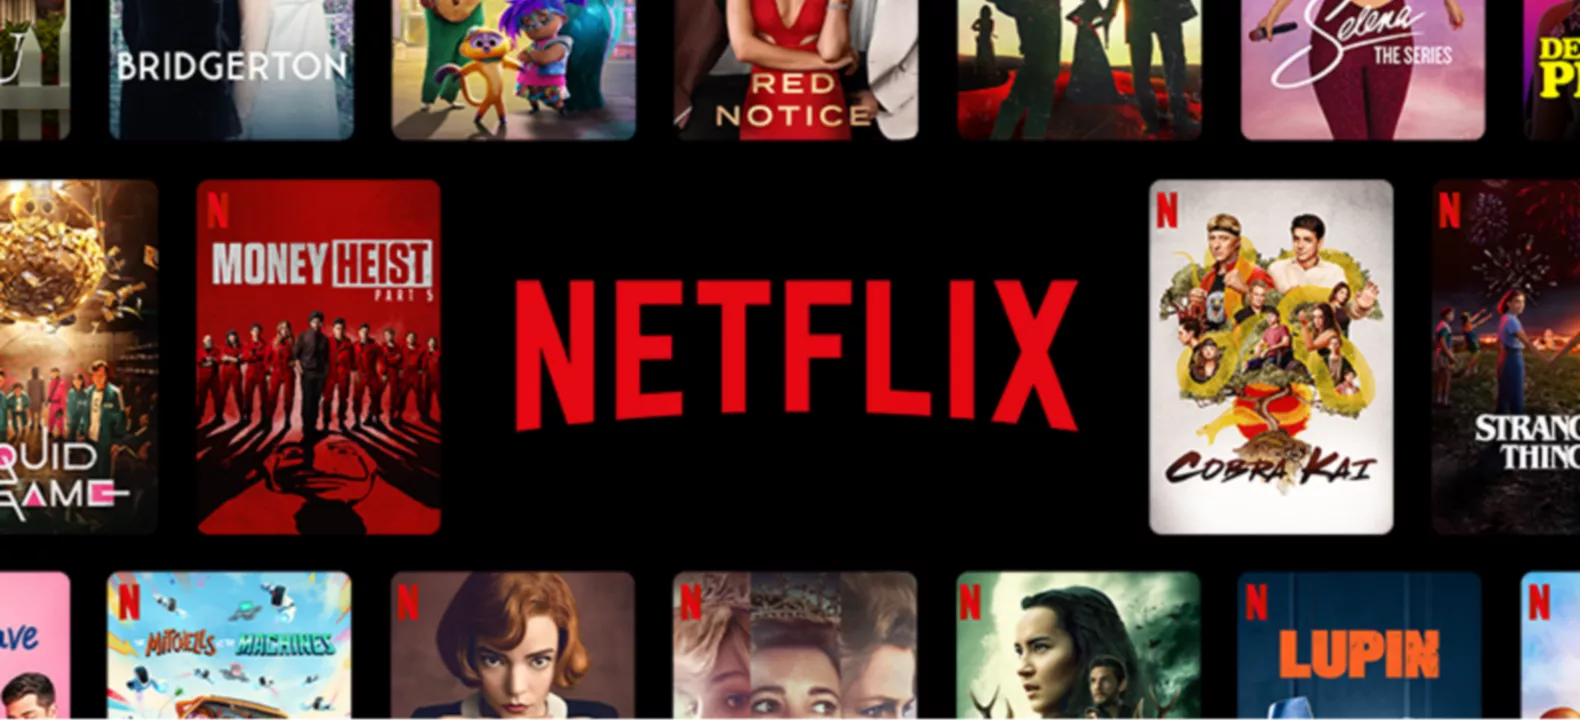

# **GitHub Link -**

https://github.com/Anand11500

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone 4 netflix movies and clustring/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
  

### Dataset First View

In [ ]:
# Dataset First Look
df.head()


In [ ]:
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

### What did you know about your dataset?

NaN values present in the director, cast, country, date_added and rating column.

All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty space in below procedure analyzing each columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all').transpose()

### Variables Description 

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

- **After analysing dataset we are more focusing toward 'show_id', 'title', 'director', 'cast', 'date_added', 'listed_in', 'description' columns and these column carry a lots of information.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Movies and TV shows

In [ ]:
# type Column Value Counts
print(df.type.value_counts())
print(" ")

# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(10,5))
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole

##### 2. What is/are the insight(s) found from the chart?

In this pie plot there are more movies 69.05% than TV shows 30.95% in the dataset.

#### Chart - 2 **country**

In [ ]:
plt.figure(figsize=(10,5))
df.country.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 countries with the highest number of movies / TV shows')

##### 1. Why did you pick the specific chart?

Bar plots allow for easy comparison between categories, making it easy to identify which categories have the highest or lowest values.

##### 2. What is/are the insight(s) found from the chart?

The highest number of movies / TV shows were based out of the US, followed by India and UK.


#### Chart - **3 Rating**

In [ ]:
plt.figure(figsize=(10,5))
df.rating.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Age ratings for shows in the dataset')

##### 2. What is/are the insight(s) found from the chart?

most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).

#### Chart - 4 Shows as per year

In [ ]:
plt.figure(figsize=(10,5))
count = sns.countplot(x="release_year", hue='type', data=df, order=range(2008,2022))
count.set_title('Number of shows released each year since 2008 that are on Netflix')
plt.xticks(rotation=90)

##### 1. Count Plot Show the counts of observations in each categorical bin using bars
**Analysis from above graph.**

1.Netflix has greater number of new movies / TV shows than the old ones.

2.Over the years, Netflix has consistently focused on adding more shows in its platform.

3.As per the plot movies rate is high as compared to tv shows

#### Chart - 5 Director

In [ ]:
# top 10 director who directed TV show
plt.figure(figsize=(10,5))
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh')
show.set_title('top 10 director who directed TV Show', size=15)

In [ ]:
# top 10 director who directed TV show
plt.figure(figsize=(10,5))
show = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh')
show.set_title('top 10 director who directed TV Movie', size=15)

##### 1. Why did you pick the specific chart?

 A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

Alastair Fothergill has directed  TV shows, the most of any director

Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet

#### Chart - 6  Top 10 genres for TV Show

In [ ]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for TV Show')

In this graph we found Top 10 genres for tv shows  and kids tv shows highest among all 

## Chart 7  Actor

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

**Analysis from above graph.**
1. **David attenborough played highest role in the TV shows.**
2. **Samuel west played highest number of role in the movies.**

#### Chart - 8

In [ ]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9  Description

In [ ]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

Most of the comman words present in description column are family, find, life, love, new, world, friend.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# checking for null values 
df.isna().sum()

The missing values in the director, cast, and country attributes can be replaced with 'empty string'

In [ ]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [ ]:
# checking for null values after treating them.
df.isna().sum()

We have successfully handled all the missing values in the datas

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)


The data that we need to create cluster/building model are present in textual foramat. So, there is no need to perform handling outlier

## Textual Data Preprocessing*

In [ ]:

# creating clustering_attributes column using all text column which one is used for model building purpose.
df['clustering_attributes'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director'] 

In [ ]:
df.clustering_attributes[0]

## Removing non-ASCII characters:

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df['clustering_attributes'] = remove_non_ascii(df['clustering_attributes'])

In [ ]:
df['clustering_attributes'][0]

# Removing Punctuation

Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df['clustering_attributes'] = df['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df['clustering_attributes'][0]

## Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

Function to remove stopwords

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)

In [ ]:
df['clustering_attributes'][0]

## Stemming

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#performing stemming operation
df['clustering_attributes'] = df['clustering_attributes'].apply(stemming)

In [ ]:
df['clustering_attributes'][0]

## Text Vectorization.

In [ ]:
# # extract the tfid representation matrix of the text data
tfid_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)  # max features = 10000 to prevent system from crashing
tfid_matrix = tfid_vectorizer.fit_transform(df['clustering_attributes'])

# collect the tfid matrix in numpy array
array = tfid_matrix.toarray() 

In [ ]:
print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')

### 7. Dimesionality Reduction

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible.

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(array)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=0)
pca.fit(array)

In [ ]:
# transformed features
X = pca.transform(array)

In [ ]:
# shape of transformed vectors
X.shape

## **Now start wih Unsupervised Machine Learning clustering algorithms**

# **K-Means Clustering**

K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data.

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,21):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,21)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**The highest Silhouette score is obtained for 6 clusters.**

Building clusters using the k-means algorithm:

In [ ]:
#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_scr = []

for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

Successfully built 4 clusters using the k-means clustering algorithm.

# Hierarchical clustering:

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(15,7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4.1, color='r', linestyle='--')

At a distance of 4.1 units, 7 clusters can be built using the agglomerative clustering algorithm

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
     

In [ ]:

for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')


## using content based recommender system

This method uses only information about description of the items users have previously consumed model users's interfernce or we also said that algorithm try to recomended items that are similar to those that a user liked in the past

In [ ]:
# dropping show-id and index column
df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:

# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

In [ ]:

# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

In [ ]:

def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = df[df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Fitoor')

In [ ]:
recommend('Time Share')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- **In this project, we worked on a text clustering problem wherein we had to cluster the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.**
- **The dataset contained about 7787 records, and 11 attributes. and we do some EDA
- **It was found that Netflix hosts more movies than TV shows on its platform,

## Thank You